# Artificial Intelligence 2 Assignment

## Peace Samuel, 121376141

## Dataset Connection

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import load_model
import os

In [2]:
# MOUNT GOOGLE DRIVE
#from google.colab import drive
#drive.mount('/content/drive')
base_dir = "./drive/My Drive/Colab Notebooks/"

In [3]:
model_path = os.path.join(base_dir, "best_model.keras")
best_model = load_model(model_path)

In [4]:
# examples directory path
examples_dir = os.path.join(base_dir, "examples")

In [5]:
#images file from directory
filenames = [os.path.join(examples_dir, filename) for filename in os.listdir(examples_dir)]


In [6]:

#path to your training dataset
train_dir = os.path.join(base_dir, "train")  # Adjust if needed

#load the dataset again
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_dir)

#extract class names
class_names = train_dataset.class_names
print("Loaded Class Names:", class_names)

#class names
# class_names = ["admiral_butterfly", "monarch_butterfly", "painted_lady_butterfly"]

print("Class Indices and Names:")
for i, class_name in enumerate(class_names):
    print(f"{i}: {class_name}")

Found 150 files belonging to 3 classes.
Loaded Class Names: ['admiral_butterfly', 'monarch_butterfly', 'painted_lady_butterfly']
Class Indices and Names:
0: admiral_butterfly
1: monarch_butterfly
2: painted_lady_butterfly


## Make Predictions with example images

In [7]:
#write a function for loading & display images, making predictions

def display_and_predict(image_path, model):
  """a function that displays image and predicts using model"""
  img = image.load_img(image_path, target_size=(224,224)) #resize to match models
  img_array = image.img_to_array(img)  #convert to array
  img_array = np.expand_dims(img_array, axis=0)  #add batch dimension
  img_array = preprocess_input(img_array)  #preprocess for ResNet

  # Make a prediction
  predictions = model.predict(img_array)
  predicted_class = np.argmax(predictions, axis=1)[0]  #get the highest probability class
  confidence = np.max(predictions)  #get confidence score

  # Display the image with prediction
  plt.imshow(img)
  plt.axis("off")
  plt.title(f"Predicted: {predicted_class} ({confidence:.2f})")
  plt.show()

The above code was developed with the help of **ChatGpt**, to understand how to use the *tensorflow.keras.preprocessing.image* function and the *tensorflow.keras.applications.resnet50.preprocess_input* function to process the images, display them and make predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


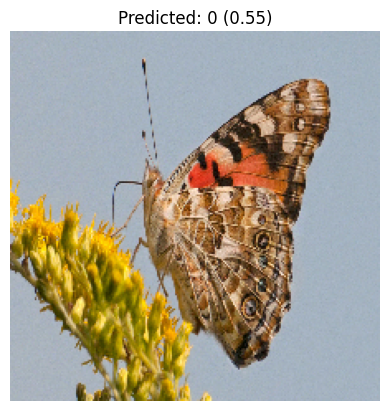

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


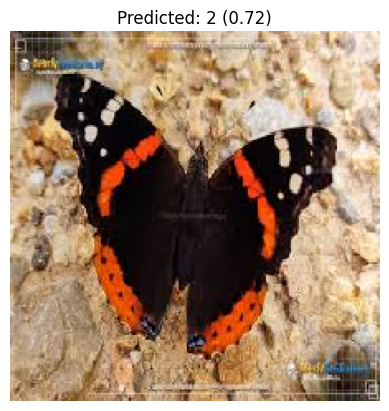

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


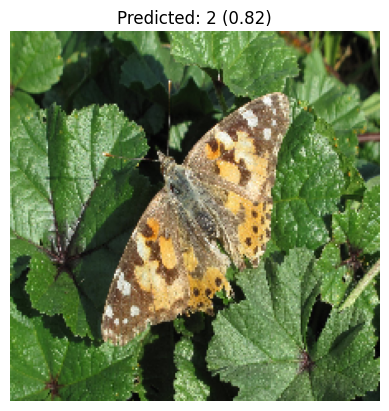

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


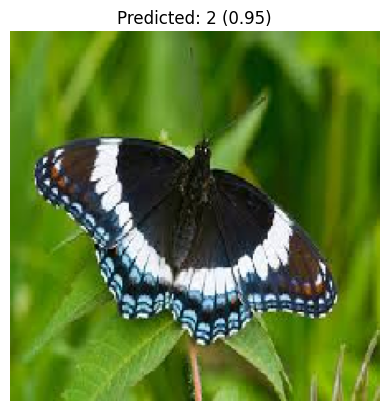

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


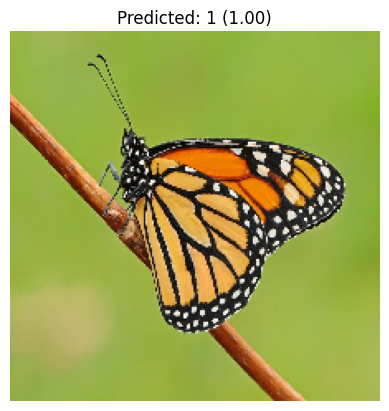

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


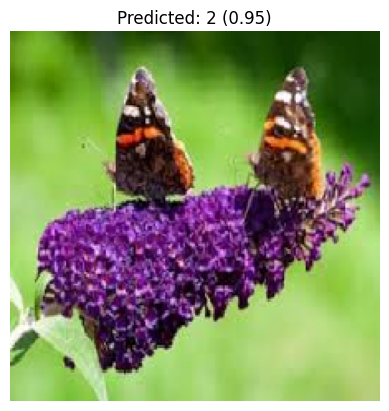

In [8]:
#loop through each image in the folder and predict
for img_path in filenames:
    display_and_predict(img_path, best_model)

## Image 1

Image 1 had an incorrect prediction, the model predicted class 0 (admiral), but the image is of a painted lady butterfly.

The model had a confidence score of 0.55.

I think the model had difficulty with classifying this image as it is the underside of the butterfly and most images in each dataset were of the topside of the butterfly, this means that the model fails to generalise well for this situation, leading to inaccuracies.
This is also reflected in the low confidence score.

## Image 2

Image 2 had an incorrect prediction, the model predicted class 2 (painted lady), but the image is of a admiral butterfly.

The model had a confidence of 0.72.

I think this image was incorrectly predicted as when I was creating the admiral butterfly dataset (out of curiosity), I used a more diverse range of admiral butterflies (various colours), this could have made it unbalanced/ more confusing to classify admiral butterflies, as there was an insufficient number of each type of admiral.

## Image 3

Image 3 had a correct prediction, the model predicted class 2 (painted lady), and the image is a painted lady butterfly.

The model had a confidence of 0.82.

## Image 4

Image 4 had an incorrect prediction, the model predicted class 2 (painted lady), but the image is a admiral butterfly.

The model had a confidence of 0.95.

This image has a similar issue as Image 2, they are both admiral butterflies (one is white/blue, the other is red). The various colours in this dataset can make it more diificult to classify. As the dataset only had 200 images, each type of admiral is underrepresented.

## Image 5

Image 5 had a correct prediction, the model predicted class 1 (monarch), and the image is a monarch butterfly.

The model had a confidence of 1.00.

I think this image was correctly classified, as out of the three butterfly classes used in this classifier this one has a more distinct pattern.
This makes it easier for the model to distinguish it from the others and learn useful features.

## Image 6

Image  6 had a correct prediction, the model predicted class 2 (painted lady), and the image is a painted lady butterfly.

The model had a confidence of 0.95.
Even though this image had two butterflies (same type), the model was still able to accurately make a prediction.

## Conclusion

The model performs really well in some areas, but less well in others for various reasons.

I think the main reason for incorrect predictions is due to butterfly species having many visual similarities (patterns, colours, wing shapes), this can make it more difficult for the model.

Image quality can also affect model performance.

Also this model was built using a relatively small dataset of only 200 images per class.

